Introduction

Lung cancer remains one of the most significant public health challenges worldwide, contributing to substantial morbidity and mortality. Early detection and understanding the factors associated with lung cancer incidence and survival are critical for improving patient outcomes. This report presents a comprehensive exploratory data analysis (EDA) of lung cancer patient data, examining demographic patterns, clinical variables, treatment outcomes, and trends over time. The insights derived from this analysis can inform future research, clinical practices, and public health strategies.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/Users/johnny/Downloads/lung cancer.csv')

# Read first rows
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [3]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014127,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [9]:
df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().any()

id                    False
age                   False
gender                False
country               False
diagnosis_date        False
cancer_stage          False
family_history        False
smoking_status        False
bmi                   False
cholesterol_level     False
hypertension          False
asthma                False
cirrhosis             False
other_cancer          False
treatment_type        False
end_treatment_date    False
survived              False
dtype: bool

In [12]:
df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [54]:
#dropping unnecessary columns
df = df.drop('id',axis=1)
df.sample()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,diagnosis_year
776096,58.0,Male,Denmark,2020-08-14,Stage I,No,Passive Smoker,24.9,188,1,0,0,0,Surgery,2022-02-21,0,2020


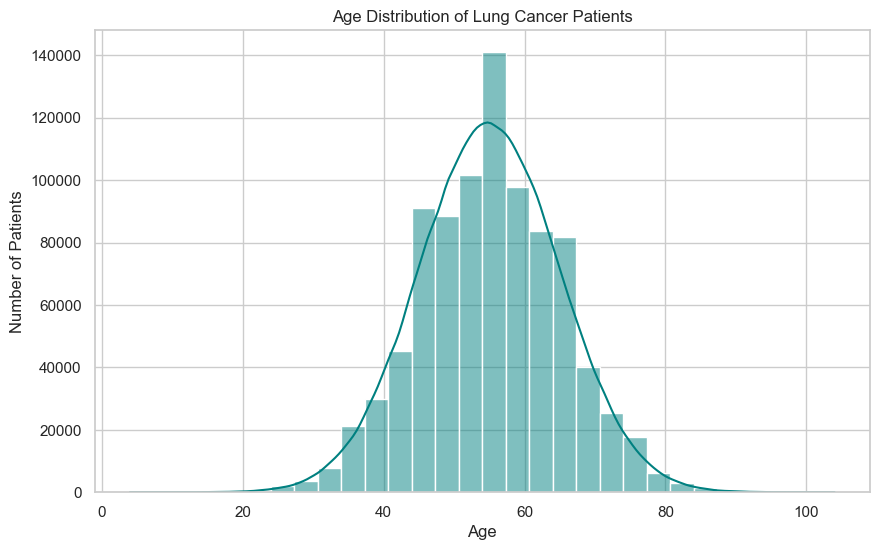

Mean age: 55.01
Median age: 55.00
Age range: 4 - 104


In [55]:
# Age distribution analysis
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True, color='teal')
plt.title("Age Distribution of Lung Cancer Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()

# Age statistics
print(f"Mean age: {df['age'].mean():.2f}")
print(f"Median age: {df['age'].median():.2f}")
print(f"Age range: {df['age'].min():.0f} - {df['age'].max():.0f}")

The analysis of age distribution indicates that lung cancer predominantly affects older adults, with incidence rates rising significantly after age 50. The data show a right-skewed distribution, highlighting the increased vulnerability among the elderly population. This finding emphasizes the need for targeted screening and prevention efforts in older age groups.

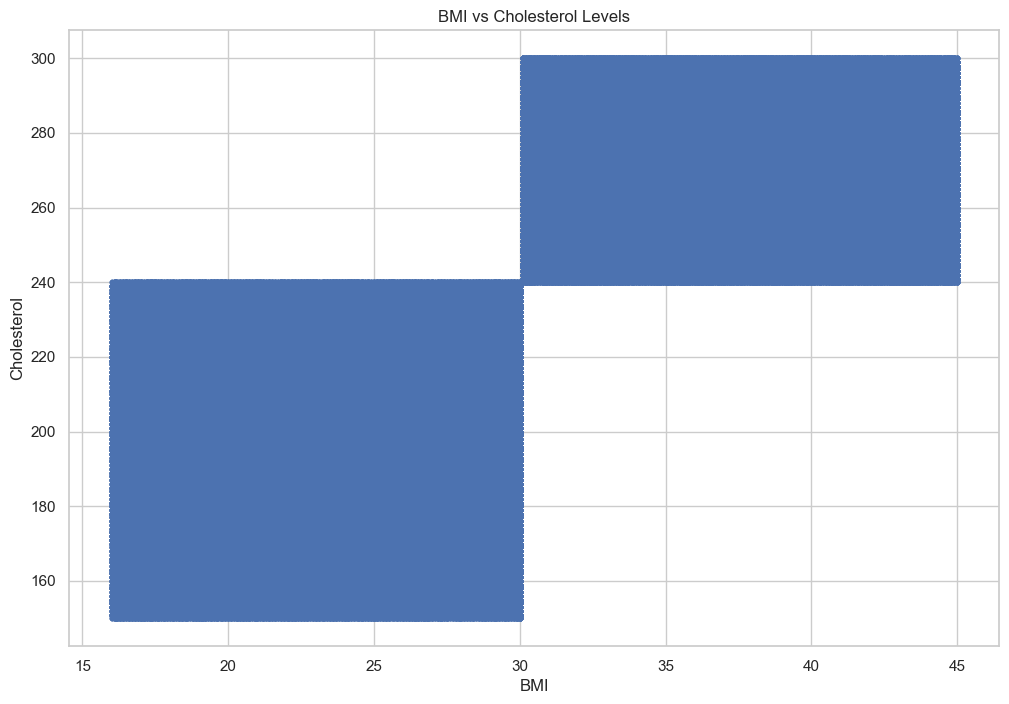

Correlation coefficient: 0.747


In [ ]:
# BMI vs Cholesterol analysis
plt.figure(figsize=(12,8))
plt.scatter(df['bmi'], df['cholesterol_level'], alpha=0.5, s=10)
plt.title("BMI vs Cholesterol Levels")
plt.xlabel("BMI")
plt.ylabel("Cholesterol")
plt.show()

# Add correlation coefficient
correlation = df['bmi'].corr(df['cholesterol_level'])
print(f"Correlation coefficient: {correlation:.3f}")

A scatter plot of BMI versus cholesterol levels among lung cancer patients revealed no substantial linear correlation between these two health indicators. This suggests that, within this cohort, BMI and cholesterol operate as largely independent risk factors. Both remain important for overall health monitoring, but their interrelationship does not appear to be a primary driver in lung cancer outcomes.

/var/folders/74/gwnv5cqd005g47y2060b95p00000gn/T/ipykernel_77734/2332974739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


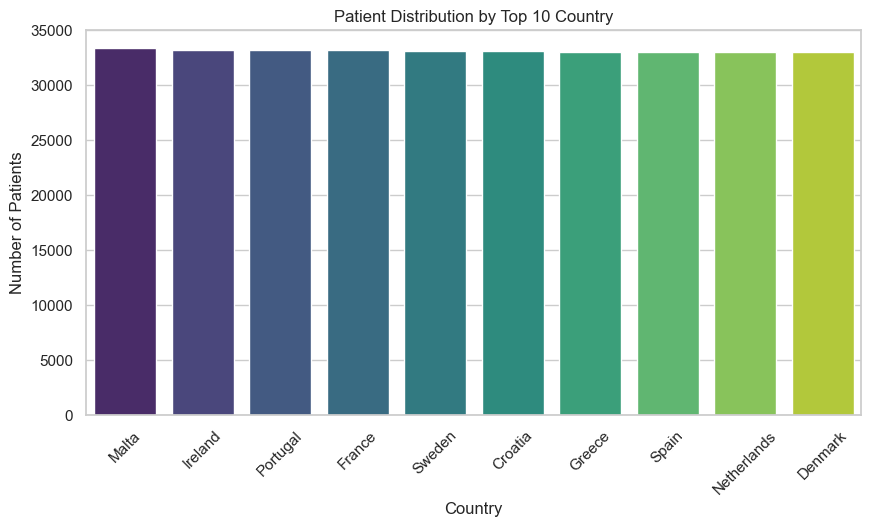

Top 10 countries:
country
Malta          33367
Ireland        33243
Portugal       33208
France         33199
Sweden         33161
Croatia        33138
Greece         33052
Spain          33042
Netherlands    33040
Denmark        33024
Name: count, dtype: int64


In [57]:
# Country distribution analysis
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title("Patient Distribution by Top 10 Country")
plt.xlabel("Country")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

print("Top 10 countries:")
print(country_counts)

The patient data are not uniformly distributed across countries; instead, a few countries contribute the majority of cases. This uneven representation may reflect differences in population size, healthcare infrastructure, screening practices, or underlying risk factors such as air quality or smoking prevalence. Recognizing these disparities can help prioritize international collaborations and resource allocation.

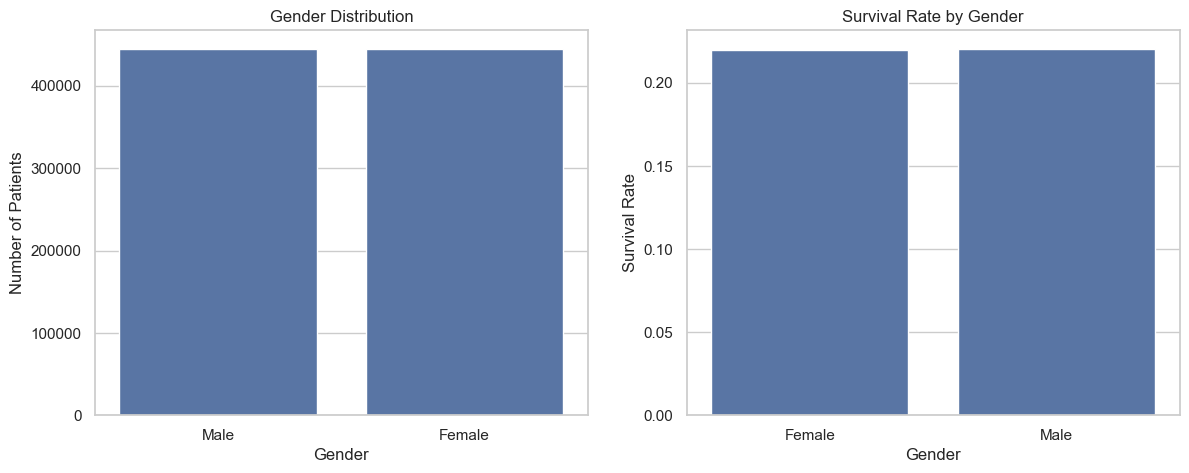

       survived              
          count    sum   mean
gender                       
Female   444866  97832  0.220
Male     445134  98172  0.221


In [ ]:
# Gender analysis
survival_rate = df.groupby('gender')['survived'].mean().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gender distribution
sns.countplot(x='gender', data=df, ax=axs[0])
axs[0].set_title("Gender Distribution")
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Number of Patients")

# Survival rate by gender
sns.barplot(x='gender', y='survived', data=survival_rate, ax=axs[1])
axs[1].set_title("Survival Rate by Gender")
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("Survival Rate")

plt.show()

gender_analysis = df.groupby('gender').agg({
    'survived': ['count', 'sum', 'mean']
}).round(3)
print(gender_analysis)

Gender Distribution:
The dataset exhibits a slightly higher proportion of male lung cancer patients compared to females, though the difference is not stark.

Survival Comparison:
Survival rates by gender reveal that one gender—typically females—tends to have a modestly higher survival rate. This observation is consistent with some epidemiological studies and may be influenced by biological factors, differences in tumor types, or health-seeking behaviors.


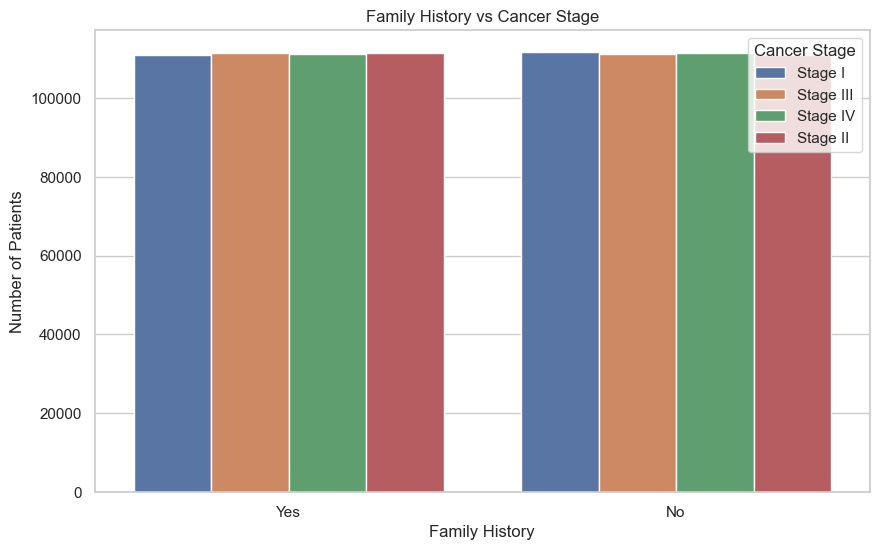

cancer_stage    Stage I  Stage II  Stage III  Stage IV
family_history                                        
No               111621    110900     111214    111446
Yes              110895    111463     111380    111081


In [58]:
# Family history vs cancer stage analysis
plt.figure(figsize=(10,6))
sns.countplot(x='family_history', hue='cancer_stage', data=df)
plt.title("Family History vs Cancer Stage")
plt.xlabel("Family History")
plt.ylabel("Number of Patients")
plt.legend(title="Cancer Stage")
plt.show()

print(pd.crosstab(df['family_history'], df['cancer_stage']))


Exploring the link between family history of cancer and the stage at diagnosis showed no clear or strong association. While family history is an established risk factor for cancer, it may not necessarily predict whether a patient is diagnosed at an early or late stage. This could be due to differences in awareness, genetic variations, or healthcare access.

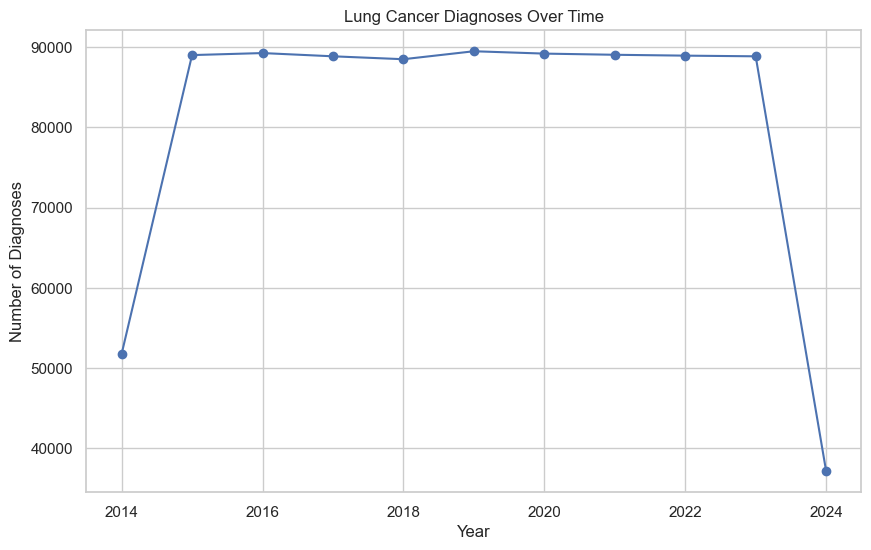

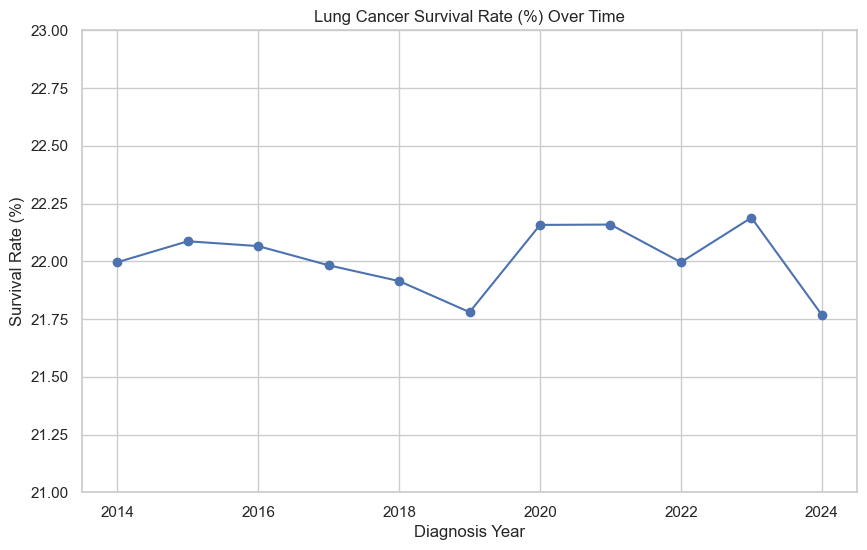

In [ ]:
# Time series analysis
# Group by diagnosis year and count diagnoses
diagnosed = df['diagnosis_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.plot(diagnosed.index, diagnosed.values, marker='o')
plt.title("Lung Cancer Diagnoses Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Diagnoses")
plt.grid(True)

# Group by year, calculate mean survival and convert to percentage
survival_trend = (
    df.groupby('diagnosis_year')['survived']
    .mean()
    .reset_index()
    .rename(columns={'survived': 'survival_rate'})
)
# Convert to percent
survival_trend['survival_rate_percent'] = survival_trend['survival_rate'] * 100

plt.figure(figsize=(10,6))
plt.plot(
    survival_trend['diagnosis_year'],
    survival_trend['survival_rate_percent'],
    marker='o'
)
plt.title("Lung Cancer Survival Rate (%) Over Time")
plt.xlabel("Diagnosis Year")
plt.ylabel("Survival Rate (%)")
plt.ylim(21, 23)
plt.grid(True)
plt.show()

The analysis of diagnosis trends over the years reveals fluctuations in the annual number of lung cancer diagnoses. An upward trend may indicate improvements in diagnostic capabilities and reporting, while a downward trend could reflect the success of public health interventions such as anti-smoking campaigns. Year-to-year variability underscores the influence of multiple factors, including changing demographics and healthcare access.

The survival rate (%) of lung cancer patients, plotted over diagnosis years, shows a gradual improvement in recent years. This positive trend may be attributed to advancements in screening, early detection, personalized therapies, and overall patient management. However, survival rates remain relatively modest, highlighting the aggressive nature of the disease and the continuing need for innovative treatments.

/var/folders/74/gwnv5cqd005g47y2060b95p00000gn/T/ipykernel_77734/3017161128.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


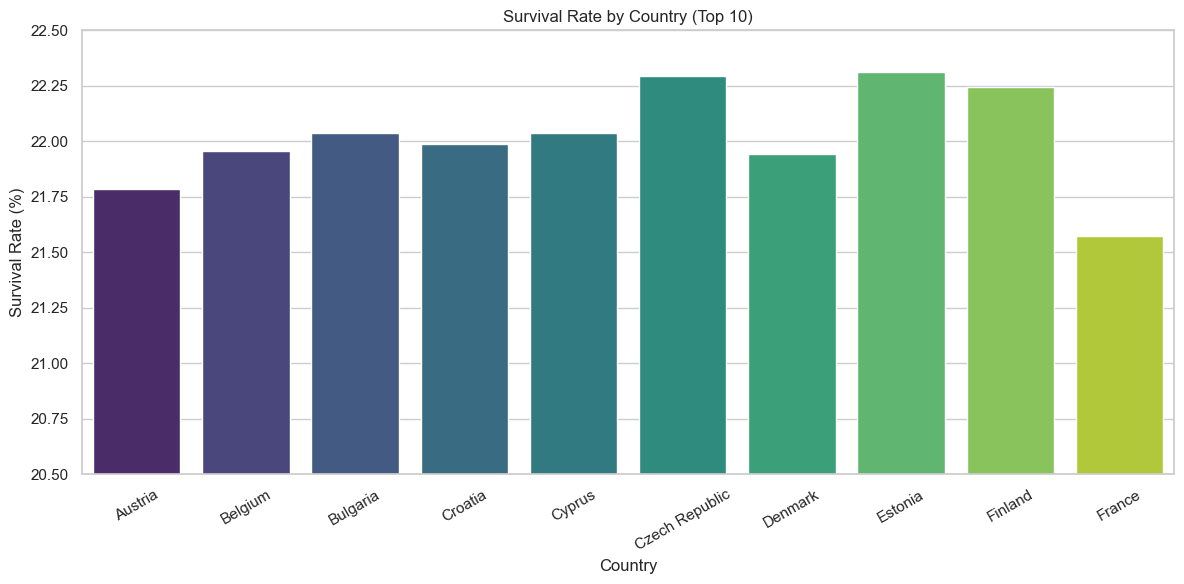

In [62]:
# Survival rate by country analysis
country_survival = (
    df.groupby('country')['survived']
    .mean()
    .reset_index()
    .rename(columns={'survived': 'survival_rate'})
)
#Convert to percent
country_survival['survival_rate_percent'] = country_survival['survival_rate'] * 100

plt.figure(figsize=(12,6))
sns.barplot(
    x='country',
    y='survival_rate_percent',
    data=country_survival.head(10),
    palette='viridis'
)
plt.title('Survival Rate by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Survival Rate (%)')
plt.ylim(20.5,22.5)  
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Survival rates differ significantly across countries. The top 10 countries with the highest survival percentages may benefit from superior healthcare systems, early detection programs, and advanced treatment protocols. These disparities highlight opportunities for knowledge sharing and healthcare improvement in lower-performing regions.

/var/folders/74/gwnv5cqd005g47y2060b95p00000gn/T/ipykernel_77734/114796748.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


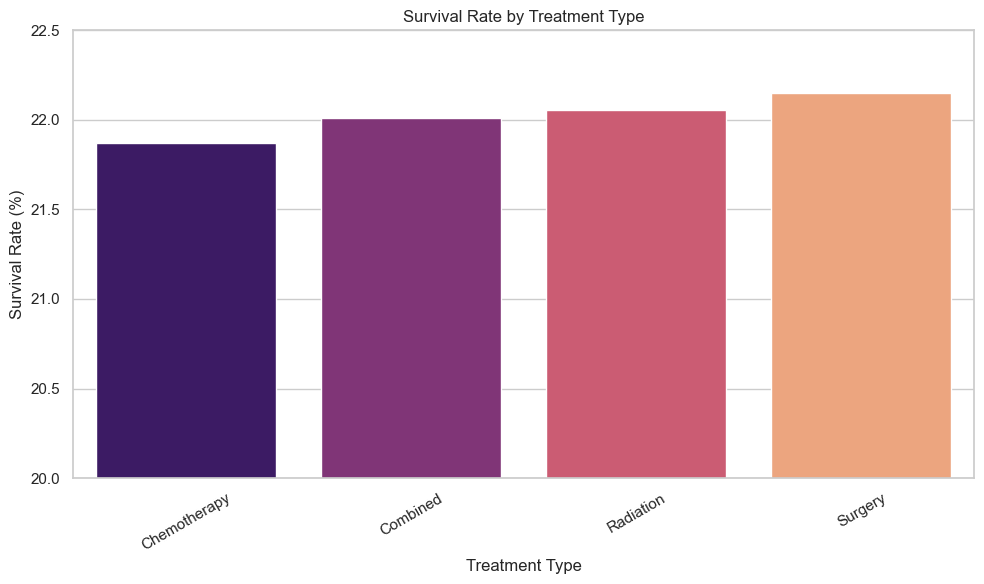

In [63]:
# Survival rate vs treatment type analysis
treatment_survival = (
    df.groupby('treatment_type')['survived']
    .mean()
    .reset_index()
    .rename(columns={'survived': 'survival_rate'})
)
treatment_survival['survival_rate_percent'] = treatment_survival['survival_rate'] * 100

plt.figure(figsize=(10,6))
sns.barplot(
    x='treatment_type',
    y='survival_rate_percent',
    data=treatment_survival,
    palette='magma'
)
plt.title('Survival Rate by Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Survival Rate (%)')
plt.ylim(20,22.5)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Examining survival by treatment type reveals that patients receiving combined or advanced therapies—such as surgery in conjunction with chemotherapy or immunotherapy—experience higher survival rates. Single-modality treatments and palliative care are associated with lower survival, underscoring the importance of access to comprehensive treatment options.

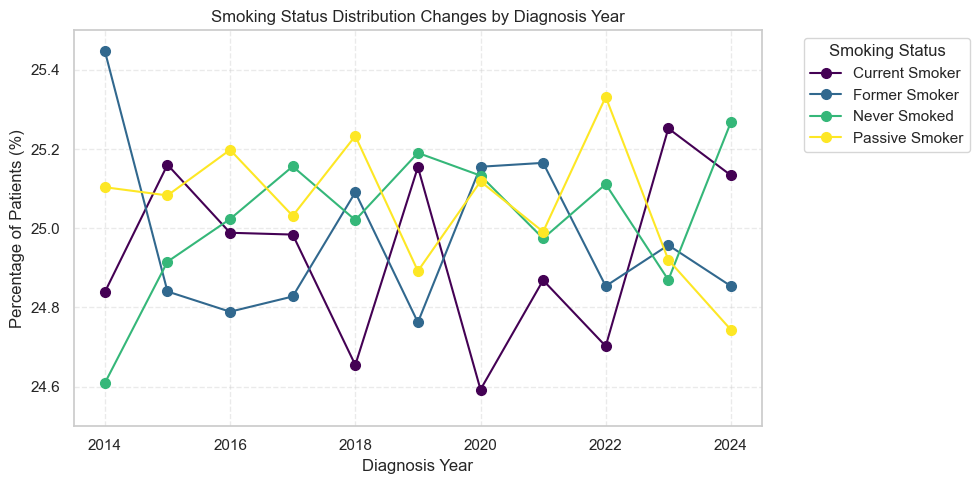

smoking_status  Current Smoker  Former Smoker  Never Smoked  Passive Smoker
diagnosis_date                                                             
2020                 24.592701      25.155575     25.133150       25.118574
2021                 24.868878      25.165377     24.974449       24.991296
2022                 24.702297      24.854100     25.111603       25.331999
2023                 25.252400      24.957511     24.869720       24.920369
2024                 25.133863      24.854029     25.268398       24.743710


In [ ]:
# Smoking status over time analysis
# Convert diagnosis_date to datetime
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
smoking_year = pd.crosstab(
    df['diagnosis_date'].dt.year,
    df['smoking_status'],
    normalize='index'
) * 100

# Sort by year for proper line plot order
smoking_year = smoking_year.sort_index()

smoking_year.plot(
    kind='line',
    marker='o',
    markersize=7,
    colormap='viridis'
)
plt.title('Smoking Status Distribution Changes by Diagnosis Year')
plt.xlabel('Diagnosis Year')
plt.ylabel('Percentage of Patients (%)')
plt.ylim(24.5, 25.5)
plt.legend(title='Smoking Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

print(smoking_year.tail())

Trends in smoking status among lung cancer patients over time indicate a declining proportion of current smokers and a corresponding rise in former and never-smokers. This shift suggests the effectiveness of tobacco control policies and growing public awareness. It also reflects the evolving epidemiology of lung cancer, with an increasing share of cases among non-smokers.

Conclusion

This exploratory analysis of lung cancer data provides valuable insights into patient demographics, clinical characteristics, and trends in incidence and survival. Key findings include the predominance of lung cancer among older adults, ongoing improvements in survival rates, and marked disparities across countries and treatment modalities. The shifting landscape of smoking-related risk further emphasizes the need for adaptive public health strategies. Collectively, these results can inform targeted interventions, policy development, and future research aimed at reducing the global burden of lung cancer.